#  Data Analysis By Python 

By: Anish Kumar  
 [My Github profile](https://github.com/Anish-kr)

In this first project,I aim to analyse the csv file-
* titanic.csv

Let's start with importing all the required libraries


## Outline of the Report

* First of all we'll load the data in a suitable variable as dataframe and have look at its features, missing values,descriptive statistics.  

* Second we'll have a look into each columns-Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked and how passenegers are distributed over each factor alone and in combination.   

* In the process we'll also be adding two extra columns to the data frame-   
 + Maturity- that shall categorize people into Male, female and child(people with age < 21  ) 
 + Alone/Family - which shall categorize people as Alone( if travelling alone) and Family(if travelling with a family)    
* We shall also be removing NaN values from columns that contain them while performing analysis using those columns   
* Next we shall investigate the survival probability of passengers varying over each field alone and in combination
* Finally we shall perform a hypothesis testing checking the inter-dependency of variables.   

In [250]:
import seaborn as sns#improves the look of the graphs
%pylab inline        
#prevents graph from flowing out of the active window
sns.set(font_scale = 1.2)

import matplotlib.pyplot as plt
import numpy as np   #for handling arrays
import pandas as pd  #for handling dataframes

Populating the interactive namespace from numpy and matplotlib


In [251]:
# reading the given csv file and storing it in a variable
titanic_data= pd.read_csv("titanic-data.csv", index_col=0)
#index_col=0 initializes 0th column as index


In [252]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary  

### Variable Definition  

#### Key  
**Survival** -> Survival  
 * 0 = No  
 * 1 = Yes  

**pclass**  -> Ticket class  
1 = 1st, 2 = 2nd, 3 = 3rd  

**sex**     -> Sex  
 
**Age**     -> Age in years  

**sibsp** -> of siblings / spouses aboard the Titanic  

**parch** -> of parents / children aboard the Titanic  

**ticket**-> Ticket number  

**fare**  -> Passenger fare  

**cabin** -> Cabin number  

**embarked**  ->  Port of Embarkation  
 * C = Cherbourg  
 * Q = Queenstown   
 * S = Southampton  
 
#### Variable Notes  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [253]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Thus we find that three of the given fields have null-data(NaN).  
They are-  
*  Age     has 714 non-null data
* Cabin    has 204 non-null data
* Embarked has 889 non-null data  

When carrying out calculations, we have to make sure these are not included.

In [254]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now as the data appears to bequite clean let us proceed with our analyses

## Taking a look at the distributions

### How was the distribution of passengers by Gender?

Males:
577

Females:
314


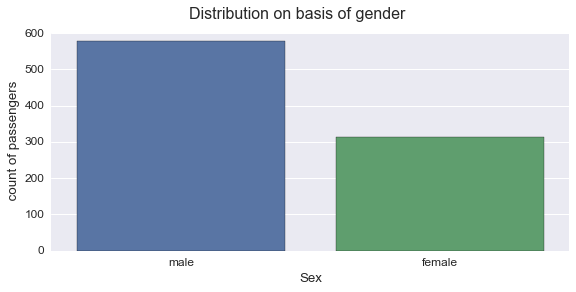

In [255]:
#calculating the passenger distribution by gender

men_pass_df = titanic_data[titanic_data['Sex']=='male']
women_pass_df=titanic_data[titanic_data['Sex']=='female']


#printing out the number of males
print "Males:"
print men_pass_df['Survived'].count()

print("")

print "Females:"
print women_pass_df['Survived'].count()

#Visualizing the distribution 

viz_gd= sns.factorplot('Sex', data= titanic_data, kind= 'count',aspect=2)
viz_gd.despine(left = True)
viz_gd.set_ylabels(" count of passengers")
viz_gd.fig.suptitle('Distribution on basis of gender',fontsize='16', y=1.02);

### How was the distribution of passengers by class  ?

We shall look into the distribution of passengers by class to investigate if count in one case differed significantly from the other

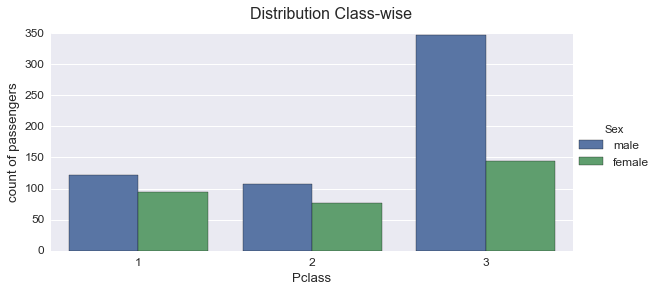

In [256]:
viz_disbyclass= sns.factorplot( 'Pclass', data= titanic_data,hue='Sex',kind='count' ,aspect=2)
viz_disbyclass.set_ylabels('count of passengers')
viz_disbyclass.fig.suptitle('Distribution Class-wise', fontsize='16', y=1.02);




From the data it is clear that majority of males onboard are from 3rd class while  
females are relatively equally distributed among all the three class

### How was the distribution of passengers on the basis of age?

Age must also have played an important role on the survivability of an individual as the children must have been given priority over others.

In [257]:
print "Age median values by Age and Sex:"
print titanic_data.groupby(['Sex','Pclass'], as_index=False).median().loc[:, ['Sex','Pclass', 'Age']]

Age median values by Age and Sex:
      Sex  Pclass   Age
0  female       1  35.0
1  female       2  28.0
2  female       3  21.5
3    male       1  40.0
4    male       2  30.0
5    male       3  25.0



>We derived a the median values of Age for each group of male and female in each class. Next as we all already know that age has many **NaN** values. So we shall fill those values with the median values from its respective group.

In [258]:
titanic_data.loc[:, 'Age'] = titanic_data.groupby(['Sex','Pclass']).transform(lambda x: x.fillna(x.median()))

In [259]:
# Checking the information about of all the individuals on board
titanic_data['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

### Visualizing the distribution 

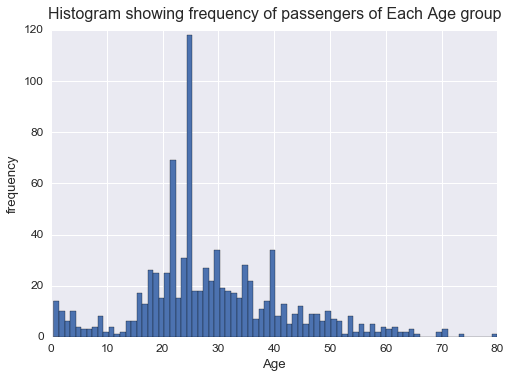

In [260]:
viz_histogram=titanic_data['Age'].hist(bins=80)
viz_histogram.set_ylabel("frequency")
viz_histogram.set_xlabel("Age");
viz_histogram.set_title("Histogram showing frequency of passengers of Each Age group",fontsize=16,y=1.02);
 

The visualiztion more of about supports the information derived before that most of passengers lie in the range of 20 to 40 and the average age of passengers on board is 29.11.

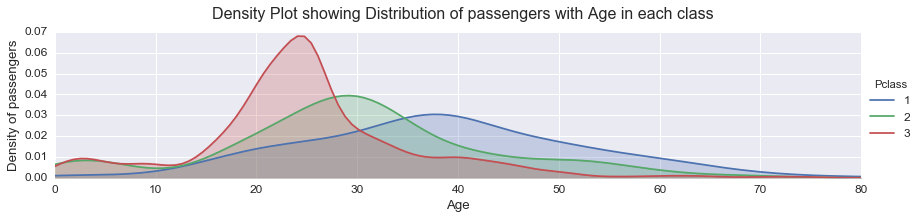

In [261]:
viz_fd_byage=sns.FacetGrid(titanic_data, hue='Pclass', aspect=4, hue_order=[1,2,3])
viz_fd_byage.map(sns.kdeplot, 'Age',shade='True')
viz_fd_byage.set(xlim=(0,80))
viz_fd_byage.set_ylabels('Density of passengers')
viz_fd_byage.fig.suptitle("Density Plot showing Distribution of passengers with Age in each class",fontsize=16,y=1.02)
viz_fd_byage.add_legend();

Using this density function we observe that for class 1 passengers are equally among all the uniformly .  
But for class 2 the majority of passsengers comprise in the age range of 15 to 45.  
And for class 2 the majority of passengers lie in the range of 10 to 40.

To get a more detailed age distribution for the passengers of the titanic we need to determine how many passengers were considered children and which passengers were considered adults as ultimately women and children had priority to lifeboats and would be expected to have a higher rate of survival due to that fact.
Using the laws that were used at the time of the sinking of the titanic it was determined any passenger below the age of 21 would be considered an "infant" or a child.

** We will add another column to the dataframe that shall label the person as child if his/her age is below 21 and adult in the otherwise case**


In [262]:
#so we will we adding another column to the dataframe that shall label the person as child if his/her age is below 21 and adult in the otherwise case

def test_maturity(data):
    age, sex = data
    if age<21 :
        return 'child'
    else:
        return sex
    
    
# # for i in (titanic_data.length()):
# titanic_data['Maturity']=titanic_data['Age'].applymap(test_maturity)
 

**Also note that since we have already taken taken care of NaN values in Age column and replaced it with the median value.  
So, where there were NaN values and they will be filled with median values and the individual will accordingly be divided into groups**

In [263]:



titanic_data['Maturity']=titanic_data[['Age', 'Sex']].apply(test_maturity, axis=1)

#Further renaming adult as males and females for ease of comaparision

    
print titanic_data['Maturity'].value_counts()



male      474
female    237
child     180
Name: Maturity, dtype: int64


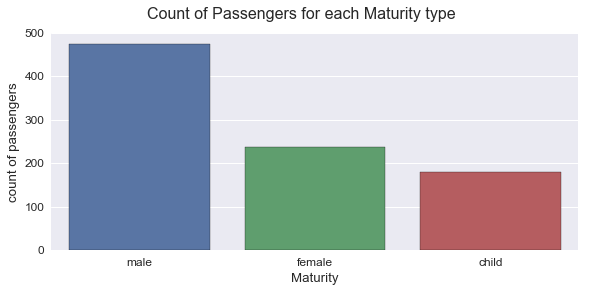

In [264]:
viz_maturity=sns.factorplot('Maturity', data=titanic_data, kind='count',aspect=2)
viz_maturity.add_legend()
viz_maturity.set_ylabels('count of passengers')
viz_maturity.fig.suptitle('Count of Passengers for each Maturity type',fontsize='16', y=1.02);

** Thus we find that still mojority of adult comprise of males.  **



### How was the distribution of passengers Maturity-wise ?

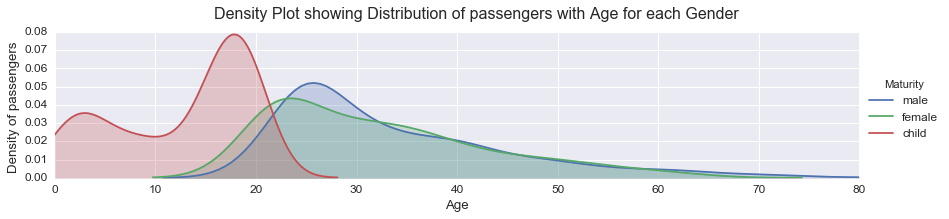

In [265]:

viz_maturity2= sns.FacetGrid(titanic_data,dropna= True, hue='Maturity',aspect=4, size=3,xlim=[0,80])
viz_maturity2.map(sns.kdeplot, 'Age', shade=True)
viz_maturity2.set_ylabels('Density of passengers ')
viz_maturity2.fig.suptitle("Density Plot showing Distribution of passengers with Age for each Gender",fontsize=16,y=1.02)

viz_maturity2.add_legend();


Thus we find that child belong to major age groups.  
One that ranges from 0-10 and other ranges from 10 to 20  

whereas adults are distributed uniformly throughout the age-group

### How was the distribution of passengers' Gender  by class?

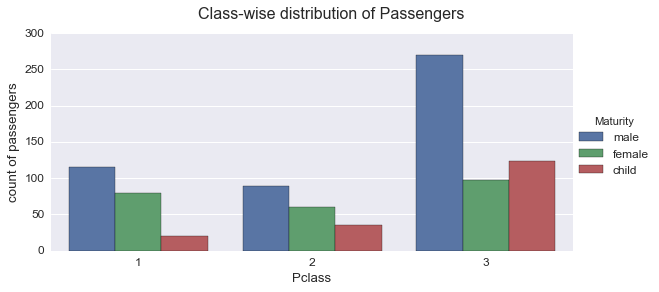

In [266]:
viz_gd0=sns.factorplot( 'Pclass', data= titanic_data, hue='Maturity', kind='count', aspect=2).set_ylabels('count of passengers')
viz_gd0.fig.suptitle('Class-wise distribution of Passengers',fontsize='16', y=1.02);

Here we are visualizing the Maturity wise distribution of people in each class formed socioeconomically.  
We find that not surprisingly majority of the population belonged to the 3rd class.  
Females seem to be uniformly distributed throughout each class.  
And children also seem to be predominantly belonging to 3rd class.  

The Titanic's passengers were divided into three separate classes, determined not only by the price of their ticket but by wealth and social class: those travelling in first class, most of them the wealthiest passengers on board, included prominent members of the upper class, businessmen, politicians, high-ranking military personnel, industrialists, bankers, entertainers, socialites, and professional athletes. Second class passengers were middle class travellers and included professors, authors, clergymen, and tourists. Third class or steerage passengers were primarily emigrants moving to the United States and Canada.[Read more](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic#First_class)

### How was the distribution of passengers on basis of Embarkment ?

S    644
C    168
Q     77
Name: Embarked, dtype: int64


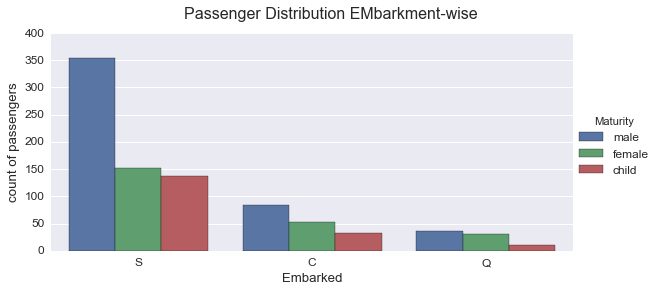

In [267]:
### Passenger distribution Embarkment-wise

print titanic_data['Embarked'].value_counts()

viz_embark1= sns.factorplot('Embarked', data=titanic_data,kind='count', hue='Maturity',size=4,aspect=2).set_ylabels('count of passengers')
viz_embark1.fig.suptitle('Passenger Distribution EMbarkment-wise',fontsize='16', y=1.02);

Around 644 passengers boarded the ship at S(Southampton, England).This was where the ship officially started its journey from.  Of these men formed the main part while female and children were relatively equal in number.   
168 passengers boarded the ship at C(Cherbourg, France)    
And 77 passengers boarded the ship at Q( Queenstown, Ireland)  

Men were in majority of boarders at all of the ports , follwed by females which in turn were followed by the child.

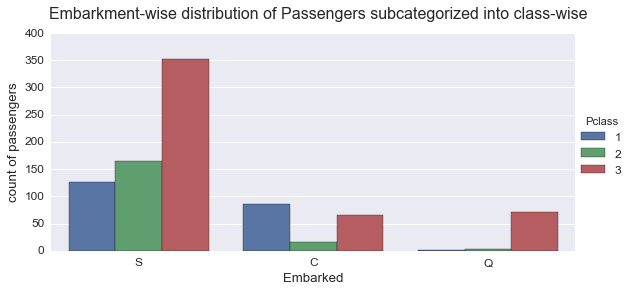

In [268]:

viz_embark2=sns.factorplot('Embarked', data=titanic_data,kind='count', hue='Pclass',dropna= True, aspect=2).set_ylabels('count of passengers')
viz_embark2.fig.suptitle('Embarkment-wise distribution of Passengers subcategorized into class-wise',fontsize='16', y=1.02);

We find that very few people from 1st and 2nd class boarded the ship from Quinston. These number appear to be significantly low as compared to others.    

 ** On doing some research we found that the superstitious burghers of Queenstown had no doubt that the Titanic was  touched by devil.**[Read more..](http://www.independent.ie/irish-news/queenstown-locals-believed-titanic-touched-by-devil-26838363.html)    
        
Majority of the passengers who boarded ship from Southampton took to third class.  Many of these third class passengers or steerage were emigrants travelling to the United States from Ireland.[ Read More.... ](http://www.historyonthenet.com/the-titanic-third-class-passengers/)
 
 
 
    

### Were they travelling alone or with family?
### Passenger distribution( Alone vs Family )


A final point to consider is the idea if the passengers traveled alone versus with family as this gives us a greater insight of passengers .
The original Titanic dataset provided us with 2 columns that are important when considering if a passenger travelled alone or with family.    
Those two columns are SibSP (Siblings on board) and Parch (Parent or Children on board).  
**We decided to create a NEW COLUMN in the original Titanic dataset that explicitly mentioned if the passenger traveled alone or with family.
Passengers were determined if they travel alone if when adding the value of SibSP and Parch in the passenger row equaled 0 and 'Alone' would be added to the column 'Solo or Family' in that passenger row, any number above 0 would mean that the passenger traveled with a family member and 'Family' would be added to the column 'Solo or Family' in that passenger row.**

In [269]:
##determining if the passenger travelled alone or with family and accordingly adding a column specifying the same .

def det_family(data):
    sib,pat = data
    tot= sib+pat
    if tot > 0:
        return 'Family'
    else:
        return 'Alone'
    


In [270]:
titanic_data['Alone/Family']= titanic_data[['SibSp', 'Parch']].apply(det_family, axis=1)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity,Alone/Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Alone     537
Family    354
Name: Alone/Family, dtype: int64


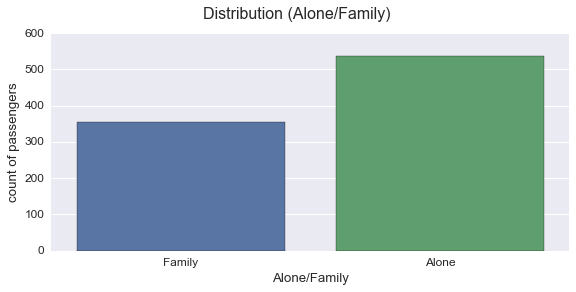

In [271]:
##visualizing the distribution
print titanic_data['Alone/Family'].value_counts()
viz_fam = sns.factorplot('Alone/Family',data= titanic_data, kind='count', aspect=2).set_ylabels('count of passengers')
viz_fam.fig.suptitle('Distribution (Alone/Family)', fontsize='16', y=1.02);


### How was the passenger distribution Cabin-wise?

In [272]:
#first let us extract the cabin column from the actual data frme 
cabin_df=pd.DataFrame(titanic_data['Cabin'].dropna().astype(str).str[0])
cabin_df.head()

,Cabin
PassengerId,
2,C
4,C
7,E
11,G
12,C


The no of passengers in each Cabin are distributed as follows 
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64


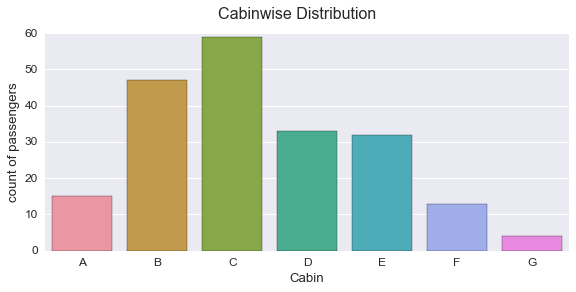

In [273]:
print "The no of passengers in each Cabin are distributed as follows \n",cabin_df['Cabin'].value_counts()
viz_cabin=sns.factorplot('Cabin', data= cabin_df,kind='count',aspect=2,order=['A','B','C','D','E','F','G']).set_ylabels('count of passengers')
viz_cabin.fig.suptitle('Cabinwise Distribution',fontsize=16,y=1.02);


In [274]:
cabin_ndclass_df=pd.concat([cabin_df,titanic_data['Pclass'],titanic_data['Survived'],titanic_data['Maturity']],axis=1)
cabin_ndclass_df.head()

,Cabin,Pclass,Survived,Maturity
PassengerId,,,,
1,NaN,3,0,male
2,C,1,1,female
3,NaN,3,1,female
4,C,1,1,female
5,NaN,3,0,male


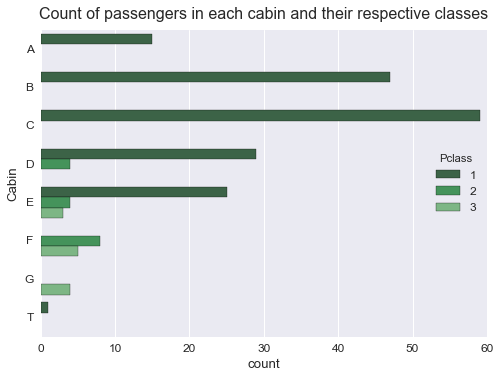

In [275]:
#Count of passengers in each cabin and theirrespective classes
viz_cabin_class=sns.countplot(y="Cabin", hue="Pclass", data=cabin_ndclass_df, palette="Greens_d",order=['A','B','C','D','E','F','G','T']);
viz_cabin_class.set_title("Count of passengers in each cabin and their respective classes",fontsize=16,y=1.02);

Looking at the distribution of 204 of the passengers on the dataset of the Titanic we see that the majority were situated at the Cabins on Deck B and C (Millionares and first class cabins), Moderately in cabins located in D and E (1st and 2nd class cabins) and a smaller amount in A,F, and G (A being officers quarters, F and G being lower class cabins)

Also from the website Encyclopedia-Titanica we come to know that T was a single first class cabin that was held by a passenger named Blackwell, Mr Stephen Weart.[Read More..](https://www.encyclopedia-titanica.org/cabins.html) It has been intentionally removed in the above chart.


# Survivability

Now we'll look into various factors could have contributed to the survivability of passengers on the ship. 

### How is the distribution of passengers who survived versus who didn't?

In [276]:
#titanic_data['Survived']=titanic_data.Survived.map({0:'NO',1:'Yes'})

In [277]:
print 'Survived \n',titanic_data['Survived'].value_counts()

Survived 
0    549
1    342
Name: Survived, dtype: int64


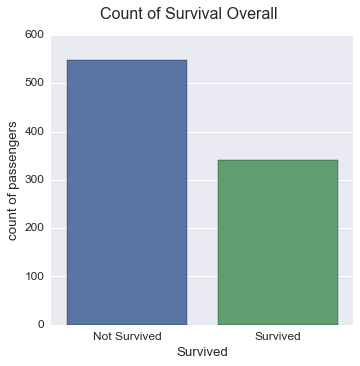

In [278]:
viz_survival_overall=sns.factorplot('Survived', data=titanic_data, size=5,kind='count').set_ylabels('count of passengers')
viz_survival_overall.fig.suptitle("Count of Survival Overall",fontsize=16,y=1.02)
viz_survival_overall.set_xticklabels(["Not Survived", "Survived"]);

We see that a larger number passenger could not survive the disaster.


## How does Survivability vary by Gender ?

For survivability gender is considered a significant factor to the tradtional practice that in times of maritime emergencies that deal with the sinking of a ship, women and children are considered priority and are among the first to be put on life boats to be brought to safety. So the expectation would be that males contribute to the majority of the deaths on the titanic.

So the first question to be considered is how was the survivability of men compared to that of women?

### Ques.1 Were men more likely to have survived than the women?

For this let us start with visualizing the available data.  
First let us separate the list on basis of those who survived and those who couldn't and also on basis of sex.



Men Survivability: 
0.188908145581
women Survivability: 
0.742038216561


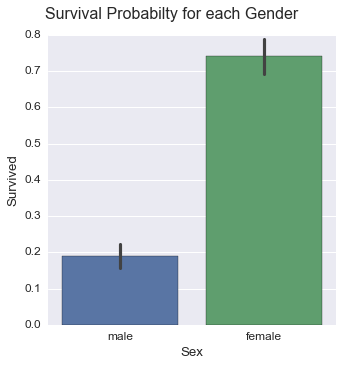

In [279]:
## our aim is to find the survivability percentage of men and women and draw a factorplot denoting the same
men_prob= men_pass_df.groupby('Sex').Survived.mean()
women_prob=  women_pass_df.groupby('Sex').Survived.mean()
gender_surv_df1 = pd.DataFrame({"Survived":[men_prob[0],women_prob[0]],"Not Survived":subtract([1,1],[men_prob[0],women_prob[0]])},index=['Male','Female'])
print 'Men Survivability: \n',men_prob[0]
print 'women Survivability: \n',women_prob[0]

viz_gender=sns.factorplot("Sex", "Survived", data=titanic_data, kind="bar", size=5)
viz_gender.fig.suptitle("Survival Probabilty for each Gender",fontsize=16,y=1.02);

We see there is a huge dfference in the probability of the chances of survival of men and female passengers.  
For women chances of survival were 74.0 %
whereas for men it was just 18.8 %  

If we give it a thought, It seems plausible because after accident, first all the female members must have been rescued.     



## How does probability of survival vary by class alone?

In order to find probability by class alone we'll first group the data by class and then find the probability of survival for each class

In [280]:
print "The data below shows the probability of survival for each class \n"
pd.DataFrame(cabin_ndclass_df.groupby('Pclass').Survived.mean())

The data below shows the probability of survival for each class 



,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


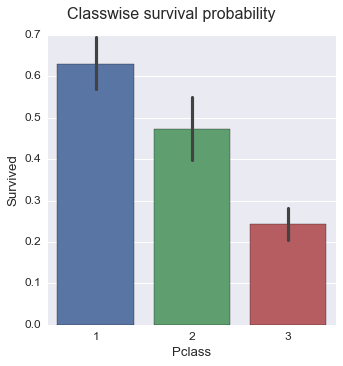

In [281]:
##plotting the barplot showing the classwise survival probability for each class
sns.factorplot('Pclass','Survived',data= cabin_ndclass_df, kind="bar",size=5).fig.suptitle("Classwise survival probability", y=1.02,fontsize=16);

## How does probability of survival vary on basis of travelling alone or with family?

In [282]:
print "Folowing table shows the probabilty of survival for each group."
pd.DataFrame(titanic_data.groupby('Alone/Family').Survived.mean())

Folowing table shows the probabilty of survival for each group.


,Survived
Alone/Family,
Alone,0.303538
Family,0.505650


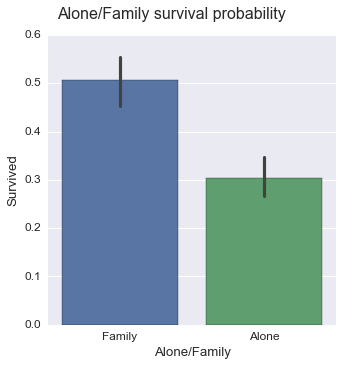

In [283]:
## Obtaining the same data via visualization

sns.factorplot('Alone/Family','Survived',data= titanic_data, kind="bar",size=5).fig.suptitle("Alone/Family survival probability", y=1.02,fontsize=16);

## How does probablity of Survival vary when considering class and sex both?

In [284]:


cabin_ndclass_df.groupby(['Pclass','Maturity']).mean()



Survived
Pclass Maturity          
1      child     0.809524
       female    0.975000
       male      0.356522
2      child     0.742857
       female    0.900000
       male      0.078652
3      child     0.314516
       female    0.494845
       male      0.118519

In [285]:

cabin_tobesorted= cabin_ndclass_df.groupby(['Pclass','Maturity'],as_index=False).mean()
cabin_sorted=cabin_tobesorted.sort(columns='Survived', axis=0, ascending=False, inplace=False);
cabin_sorted

C:\Users\anish\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Pclass,Maturity,Survived
1,1,female,0.975000
4,2,female,0.900000
0,1,child,0.809524
3,2,child,0.742857
7,3,female,0.494845
2,1,male,0.356522
6,3,child,0.314516
8,3,male,0.118519
5,2,male,0.078652


We find that following were the first few ranks or say order of survivability -  
1) female from 1st class had maximum chances of survival -> 97.5%  
2) Then came the female of 2nd class                     -> 90.0%    
3) Child of 1st class                                    -> 80.95%   
4) Child of 2nd class                                    -> 74.28%   
5) Female of Third Class                                 -> 49.48%   
6) male of first class                                   -> 35.65%   
7) Child of 3rd class                                    -> 31.45%   
8) male of 3rd class                                     -> 11.85%  
9) male of 2nd class                                     -> 7.86%

### How probablity of Survival vary when considering both Maturity Type and sex ?

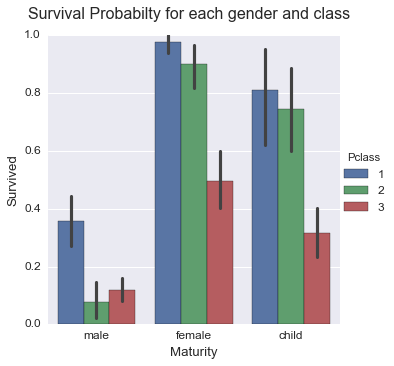

In [286]:
viz_maturity=sns.factorplot("Maturity","Survived",kind="bar",hue="Pclass",size=5,data=cabin_ndclass_df)
viz_maturity.fig.suptitle("Survival Probabilty for each gender and class",fontsize=16,y=1.02);

### How does survivability vary by Age and class?

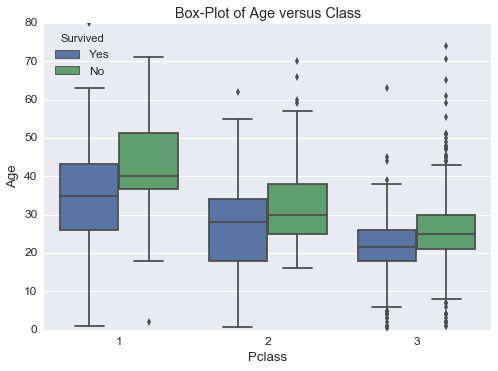

In [287]:
#Survivability by age and class
titanic_data['Survived']=titanic_data.Survived.map({0:'No', 1:'Yes'})
box_viz=sns.boxplot(data=titanic_data.dropna(subset = ['Age']).sort_values('Pclass'),x='Pclass',y='Age',hue='Survived')
box_viz.set(title="Box-Plot of Age versus Class");


## Box-Plot of Age versus Sex

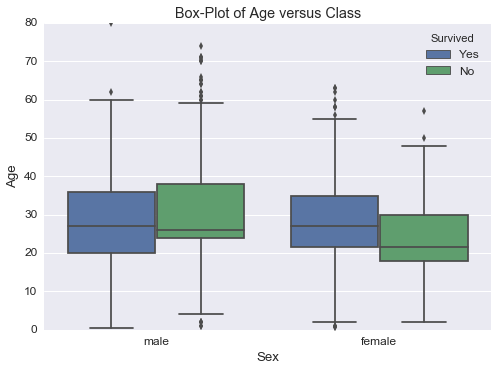

In [288]:

box_viz=sns.boxplot(data=titanic_data.dropna(subset = ['Age']).sort_values('Pclass'),x='Sex',order=['male','female'],y='Age',hue='Survived')
box_viz.set(title="Box-Plot of Age versus Class");


## Survivability cabin wise-

In [289]:
cab_surv=pd.DataFrame({'Pcount':cabin_df['Cabin'].value_counts()})
cab_surv

,Pcount
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [290]:
cabin_df2= pd.concat([titanic_data['Survived'][titanic_data.Cabin.notnull()], cabin_df], axis=1)

cabin_df2.head()

,Survived,Cabin
PassengerId,,
2,Yes,C
4,Yes,C
7,No,E
11,Yes,G
12,Yes,C


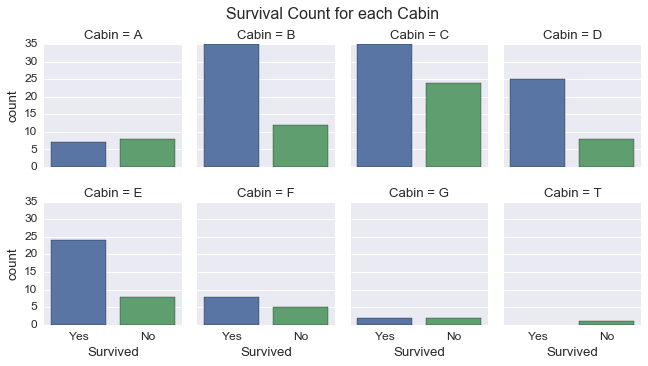

In [291]:

viz_cabinwise_facet=sns.factorplot("Survived", col="Cabin", col_wrap=4,data=cabin_df2,kind="count", size=2.5, aspect=.9,legend_out=False,col_order=['A','B','C','D','E','F','G','T'])
viz_cabinwise_facet.fig.suptitle("Survival Count for each Cabin",fontsize=16,y=1.02);


** Visulaizations showing a distribution of count of survived passengers over cabins**


## Limitations Of Analysis

**Missing Data**- - 

+ The given data Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. That is less that than half of total number of passengers. This large amount of data can largely distort our results.

+ ** NAN elements present in the dataset. Of the data obatained there are fields that have data missing. **.We saw that not every column was filled with data for every passenger. We found that ‘age’ column has only 714 elements, ‘Cabin’ column at 204 elements and ‘Embarked’ at 889 elements out of the total count of passengers of 891 in the Titanic Dataset. The disparity of element counts among different columns will affect the calculations of those particular columns and make the argument less influential.

**Limitations of relying only on statistical calculations without statistical testing**

Moreover most of analysis and inference obatined is on basis of correlation between variables and no definite hypothesis testing has been done to prove the stance.  

All the opinions stated are merely on the basis of trend observations and correlation.   

Statistical Testing in turn can go a long way in making definite conclusions. An important note to point out as well is that with statistical testing, we can approch a clearer statistically significant relationship between aspects of the dataset, involving a confidence percentage of determined rejection or acception of the null hypothesis.





**Missing possible factors that can effect analysis**

+ Another point to consider is that the dataset focuses on basic aspects of the passenger (age, gender, cabin location, socioeconomical class) however doesn't bring more subjective aspects into light that may influence survivalbility of the passenger. However we don't know if all the passenegers were in their cabin during accident or out somwhere. Their individual location from lifeboats could have played a major role in their survival.

+ Also in case of emergencies the confusion and rush that crops can pose a large hindrance in the path of a passeneger.
Especially for the women and children group which could in turn drastically increases their chances of death.

+ We don't know about the location of lifeboats on the ships. Was it uniformly distributed or peole from some had cabin were in for more easy reach tothan others? 

+ Also, Was the rule of 'saving women and children first' in case of Maritime emergencies followed? Or men form different classes sneaked in their places?

## Conclusion
#### Different Factors and their affect on Survivabilty

### Age :

From the various chart obtained showing '*Survivability by Age*' And '*Survivability by Age and class*' both clearly show that age did have an effect on survivability of passengers. 

In each one we can see that the people from oldgroup were more among non-survivors.
There could be several reasons behind it. Agility could be one. Old people were more slow towards reacting to emergency conditions. Even in each class wise distribution, observation is same.



### Gender:

 Gender is another statistic in a passenger that was as always very influential to survival in times of maritime emergencies as it is expected that females are priority to life boats and males only go on lifeboats after all females and children are already on the lifeboats.

From the chart 'Box-Plot of Age versus Class' we observe that the mean age for the male survivor group is pulled downwards while for the non-Survivor group it is pulled towards the older ages.   

However in the case of fame the reverse happens.   
Survivor group of females tends to have their IQR and mean that favored older aged females, while non-survivor females tended to be pulling for younger aged females.

When looking at the probability values we see very clearly that male survival rate collectively is about 19% versus females collectively around 74% survival.
Looking more deeper into gender focusing on socioeconomical classes as well which is shown in the graph "Probability of Survival by Class and Gender" we see that again, females predominantly had a significant survival rate as compared to their male counterparts in each of the Pclasses.


### Maturity( Children over adults)

 Children are considered a  a priority alongwith women. Therefore it is expected that children would either have a equaivalent survival rate to females or fairly close to survival rate of female adults.

From the Chart showing Probablity of Survival considering Maturity type and sex both with respect to classes ,we see that in each of the socioeconomical classes children followed fairly accurately the female survival rates

### Class of reservation

From the charts on Survivability by Age and class, Probability of survival by class alone, we can say that class is definitely the role playing part in increasing the survivability of a person. 

From the table obatined we see that 

Survival chances   
for class 1 were 62.9630 %  
                 for class 2 were 47.2826 %  
             and for class 3 were 24.2363 %   
             
The reason behind this is quite obvious from the fact that higher class which comprised of influential people were considered a priority during emergency.

### Cabin

From the visualization obatained showing distribution of survival with cabins, we notice that cabins B, C, D, E had much better survival rates. Cabin B and C (Millionares and first class cabins), and in cabins located in D and E (1st and 2nd class cabins), Thus they had larger rates of survival.



## Statistical Testing to validate findings (Gender and Survivalbility)


Statistical testing is a definite way to consider validating results than simply making correlational observations. In terms of gender and the idea of survivalbility the Chi-Square Test for Independence can be used. As the Chi-Square test can be applied to two categorical variables from a single population (two categorical variables - male and female, single population - passengers of the Titanic

Since the two variables we have are 
* nominal
* is based on frequencies/ proportions
* is not based on normal distribution 
* and no way is present to calculate mean and standard deviation

We'll prefer going with the Chi-square test that fits best in such a situation as these are what are the *ASSUMPTIONS*  for a chi-square test.



In [293]:
## creating a dataframe on gender basis showing the count of passengers who survived and who didn't distributed over gender
titanic_data['Survived']=titanic_data.Survived.map({'No':0,'Yes':1})
surv_data=titanic_data.groupby('Sex').Survived.sum().values
not_surv_data=titanic_data.groupby('Sex').Survived.count()- titanic_data.groupby('Sex').Survived.sum()
chi_test1_data= pd.DataFrame({'Survived':surv_data,'Not survived':not_surv_data.values},index=['Female','Male'])
chi_test1_data

,Not survived,Survived
Female,81,233
Male,468,109


H<sub>0</sub> : Survival rates are not different on gender Basis. It is independant of Gender.  
H<sub>A</sub> : Null hypothesis is not true. 

In [294]:
people_survival = np.array([[surv_data[1], not_surv_data[1]],[surv_data[0],not_surv_data[0]]]) 
print (people_survival )

[[109 468]
 [233  81]]


In [295]:
## performing the chi-square test
import scipy as sp 
sp.stats.chi2_contingency(people_survival) 

(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 221.47474747,  355.52525253],
        [ 120.52525253,  193.47474747]]))

The output by the chi2_contingency function gives us the results chi-square independance test:   

+ The first value indicates the **chi-square value: 260.717020 **  
+ The Second value is the **p-value: 1.1973570627755645e-58  **   
+ The Third value is the **degrees of freedom: 1L    **
+ The fourth value is expected frequencies table   

The result obtained gives p value which is << .00001   
Thus the obtained result is significance at <body>&#945;</body> equals 0.5   

Thus we can reject the Null Hypothesis and accept the alternative hypothesis which is gender and survivalbility are dependant of each other.


## References

+ [Wikipedia:](https://en.wikipedia.org/wiki/Chi-squared_test)
+ [Scipy Referance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
+ [Seaborn help](seaborn.pydata.org)
+ [Stackoverflow.com](http://stackoverflow.com/questions/18062135/combining-two-series-into-a-dataframe-in-pandas)
+ [More on titanic data](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic)
+ [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivors/)
+ [Get first letter of a string from column](http://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column)
